In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

import matplotlib.pyplot as plt

2023-06-20 21:54:24.324941: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
plt.rcParams["figure.figsize"] = [12.0, 8.0]
plt.rcParams["font.size"] = 20

## Quick Plot Method

In [4]:
def plot_keras(model, plot_type="loss"):
    assert plot_type in ["loss", "accuracy"]
    if plot_type == "loss":
        title, train_key, val_key = "loss", "loss", "val_loss"
    else:
        title, train_key, val_key = "accuracy", "binary_accuracy", "val_binary_accuracy"
    
    plt.plot(model.history.history[train_key], label="train")
    plt.plot(model.history.history[val_key], label="val")
    plt.title(title)
    plt.xlabel("epoch")
    plt.grid()
    plt.legend()

## Get Data

In [5]:
train_csv_df = pd.read_csv("nlp-getting-started/train.csv")

In [6]:
train_df, val_df = train_test_split(train_csv_df, train_size=0.85, random_state=1)

In [7]:
vectorizer = TfidfVectorizer(min_df=25, ngram_range=(1,10))
train_tfidf = vectorizer.fit_transform(train_df["text"])
val_tfidf = vectorizer.transform(val_df["text"])

train_tfidf.shape, val_tfidf.shape

((6471, 702), (1142, 702))

In [8]:
vectorizer_2 = TfidfVectorizer(min_df=10, ngram_range=(2,2))
train_tfidf_2 = vectorizer_2.fit_transform(train_df["text"])
val_tfidf_2 = vectorizer_2.transform(val_df["text"])

train_tfidf_2.shape, val_tfidf_2.shape

((6471, 679), (1142, 679))

In [9]:
logistic_regression = tf.keras.models.Sequential([tf.keras.layers.Dense(units=1, activation='sigmoid')])

logistic_regression.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                            optimizer=tf.keras.optimizers.Adam(),
                            metrics=[tf.keras.metrics.BinaryAccuracy(), 
                                     tf.keras.metrics.AUC()])

logistic_regression.fit(train_tfidf.todense(), train_df["target"], 
                        validation_data=(val_tfidf.todense(), val_df["target"]),
                        epochs=100)

Epoch 1/100
203/203 [==============================] - 1s 2ms/step - loss: 0.6764 - binary_accuracy: 0.6324 - auc: 0.6807 - val_loss: 0.6617 - val_binary_accuracy: 0.6559 - val_auc: 0.7725
Epoch 2/100
203/203 [==============================] - 0s 1ms/step - loss: 0.6489 - binary_accuracy: 0.6922 - auc: 0.7935 - val_loss: 0.6394 - val_binary_accuracy: 0.6830 - val_auc: 0.7955
Epoch 3/100
203/203 [==============================] - 0s 1ms/step - loss: 0.6277 - binary_accuracy: 0.7166 - auc: 0.8140 - val_loss: 0.6217 - val_binary_accuracy: 0.7180 - val_auc: 0.8045
Epoch 4/100
203/203 [==============================] - 0s 1ms/step - loss: 0.6099 - binary_accuracy: 0.7429 - auc: 0.8221 - val_loss: 0.6066 - val_binary_accuracy: 0.7347 - val_auc: 0.8090
Epoch 5/100
203/203 [==============================] - 0s 1ms/step - loss: 0.5944 - binary_accuracy: 0.7560 - auc: 0.8283 - val_loss: 0.5935 - val_binary_accuracy: 0.7469 - val_auc: 0.8119
Epoch 6/100
203/203 [==============================] - 

203/203 [==============================] - 0s 1ms/step - loss: 0.4324 - binary_accuracy: 0.8149 - auc: 0.8814 - val_loss: 0.4665 - val_binary_accuracy: 0.7890 - val_auc: 0.8478
Epoch 45/100
203/203 [==============================] - 0s 1ms/step - loss: 0.4313 - binary_accuracy: 0.8149 - auc: 0.8819 - val_loss: 0.4659 - val_binary_accuracy: 0.7872 - val_auc: 0.8482
Epoch 46/100
203/203 [==============================] - 0s 1ms/step - loss: 0.4301 - binary_accuracy: 0.8155 - auc: 0.8822 - val_loss: 0.4653 - val_binary_accuracy: 0.7872 - val_auc: 0.8484
Epoch 47/100
203/203 [==============================] - 0s 1ms/step - loss: 0.4291 - binary_accuracy: 0.8158 - auc: 0.8826 - val_loss: 0.4646 - val_binary_accuracy: 0.7863 - val_auc: 0.8487
Epoch 48/100
203/203 [==============================] - 0s 1ms/step - loss: 0.4281 - binary_accuracy: 0.8163 - auc: 0.8829 - val_loss: 0.4641 - val_binary_accuracy: 0.7863 - val_auc: 0.8488
Epoch 49/100
203/203 [==============================] - 0s 1ms/

203/203 [==============================] - 0s 1ms/step - loss: 0.4051 - binary_accuracy: 0.8241 - auc: 0.8912 - val_loss: 0.4550 - val_binary_accuracy: 0.7907 - val_auc: 0.8521
Epoch 88/100
203/203 [==============================] - 0s 1ms/step - loss: 0.4048 - binary_accuracy: 0.8237 - auc: 0.8913 - val_loss: 0.4550 - val_binary_accuracy: 0.7916 - val_auc: 0.8521
Epoch 89/100
203/203 [==============================] - 0s 1ms/step - loss: 0.4045 - binary_accuracy: 0.8244 - auc: 0.8914 - val_loss: 0.4549 - val_binary_accuracy: 0.7925 - val_auc: 0.8521
Epoch 90/100
203/203 [==============================] - 0s 1ms/step - loss: 0.4042 - binary_accuracy: 0.8252 - auc: 0.8915 - val_loss: 0.4548 - val_binary_accuracy: 0.7925 - val_auc: 0.8523
Epoch 91/100
203/203 [==============================] - 0s 1ms/step - loss: 0.4038 - binary_accuracy: 0.8244 - auc: 0.8917 - val_loss: 0.4547 - val_binary_accuracy: 0.7933 - val_auc: 0.8523
Epoch 92/100
203/203 [==============================] - 0s 1ms/

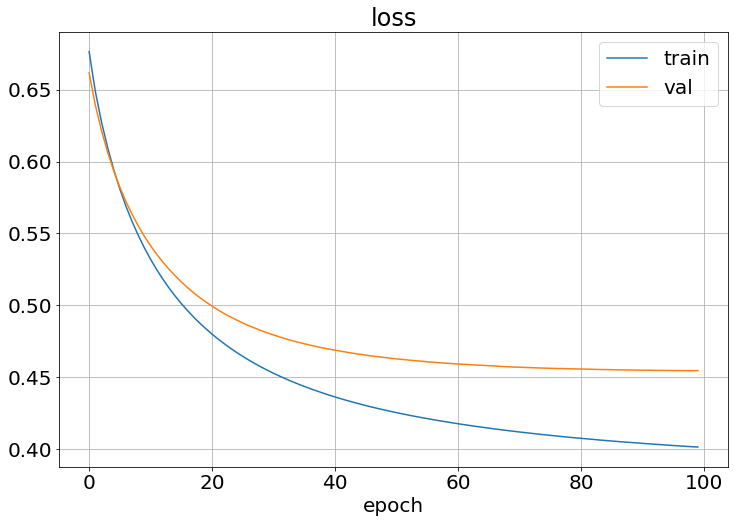

In [10]:
plot_keras(logistic_regression, plot_type="loss")

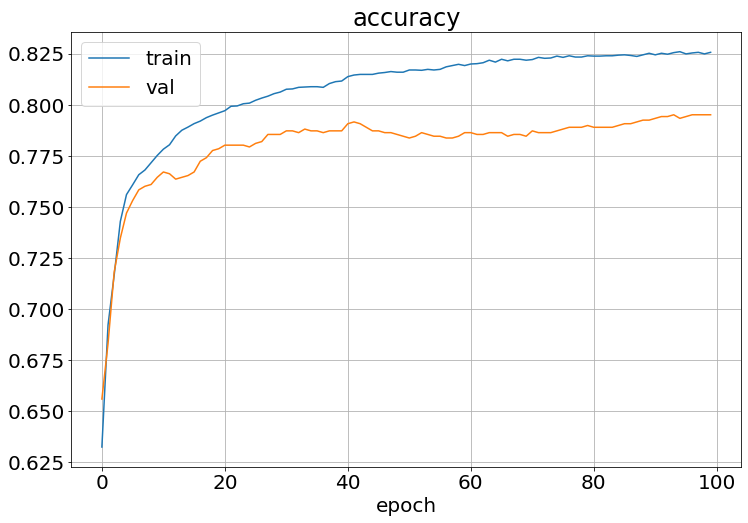

In [11]:
plot_keras(logistic_regression, plot_type="accuracy")

### Metrics

36/36 [==============================] - 0s 958us/step


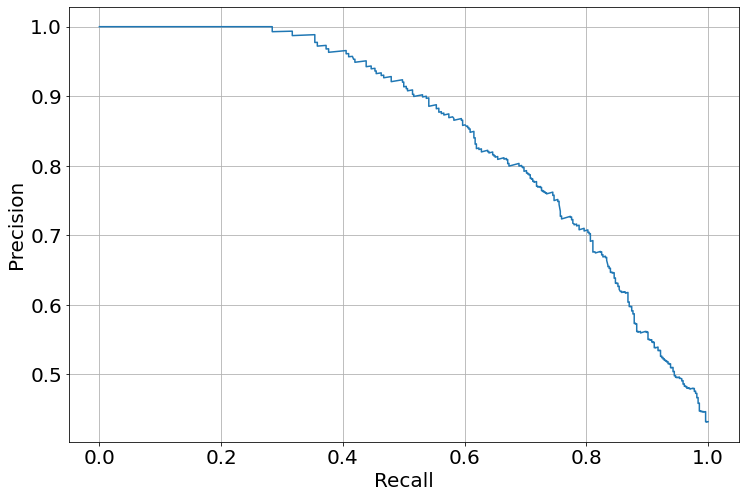

In [12]:
precision, recall, t = precision_recall_curve(val_df["target"], logistic_regression.predict(val_tfidf.todense()))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()

36/36 [==============================] - 0s 1ms/step


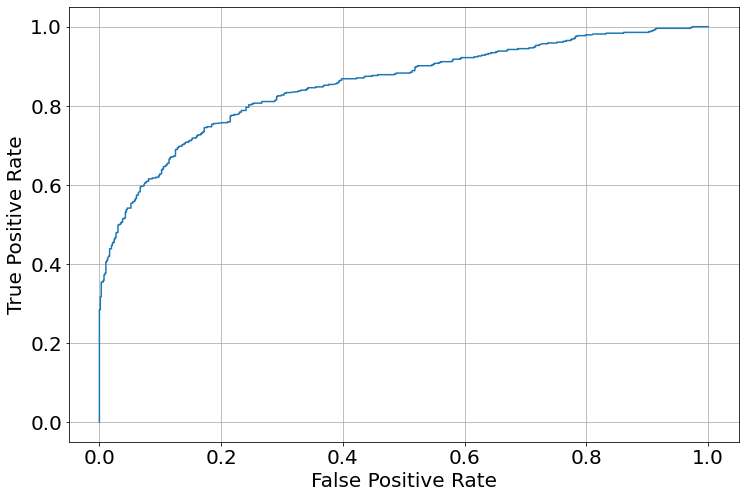

In [13]:
fpr, tpr, t = roc_curve(val_df["target"], logistic_regression.predict(val_tfidf.todense()))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()

In [14]:
val_predict_logistic_regression = logistic_regression.predict(val_tfidf.todense())
roc_auc_score(val_df["target"], val_predict_logistic_regression)

36/36 [==============================] - 0s 892us/step


0.8525575880758809

Slightly overfit

In [15]:
logistic_regression_2 = tf.keras.models.Sequential([tf.keras.layers.Dense(units=1, activation='sigmoid')])

logistic_regression_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                            optimizer=tf.keras.optimizers.Adam(),
                            metrics=[tf.keras.metrics.BinaryAccuracy(), 
                                     tf.keras.metrics.AUC()])

logistic_regression_2.fit(train_tfidf_2.todense(), train_df["target"], 
                        validation_data=(val_tfidf_2.todense(), val_df["target"]),
                        epochs=100)

Epoch 1/100
203/203 [==============================] - 1s 2ms/step - loss: 0.6857 - binary_accuracy: 0.5930 - auc_1: 0.5724 - val_loss: 0.6779 - val_binary_accuracy: 0.6165 - val_auc_1: 0.6451
Epoch 2/100
203/203 [==============================] - 0s 1ms/step - loss: 0.6701 - binary_accuracy: 0.6245 - auc_1: 0.7033 - val_loss: 0.6656 - val_binary_accuracy: 0.6226 - val_auc_1: 0.7040
Epoch 3/100
203/203 [==============================] - 0s 2ms/step - loss: 0.6577 - binary_accuracy: 0.6291 - auc_1: 0.7358 - val_loss: 0.6558 - val_binary_accuracy: 0.6305 - val_auc_1: 0.7193
Epoch 4/100
203/203 [==============================] - 0s 2ms/step - loss: 0.6470 - binary_accuracy: 0.6449 - auc_1: 0.7523 - val_loss: 0.6472 - val_binary_accuracy: 0.6401 - val_auc_1: 0.7279
Epoch 5/100
203/203 [==============================] - 0s 2ms/step - loss: 0.6377 - binary_accuracy: 0.6534 - auc_1: 0.7581 - val_loss: 0.6398 - val_binary_accuracy: 0.6445 - val_auc_1: 0.7340
Epoch 6/100
203/203 [==============

203/203 [==============================] - 0s 1ms/step - loss: 0.5252 - binary_accuracy: 0.7350 - auc_1: 0.8035 - val_loss: 0.5556 - val_binary_accuracy: 0.7067 - val_auc_1: 0.7584
Epoch 44/100
203/203 [==============================] - 0s 1ms/step - loss: 0.5243 - binary_accuracy: 0.7348 - auc_1: 0.8025 - val_loss: 0.5550 - val_binary_accuracy: 0.7075 - val_auc_1: 0.7585
Epoch 45/100
203/203 [==============================] - 0s 1ms/step - loss: 0.5233 - binary_accuracy: 0.7356 - auc_1: 0.8035 - val_loss: 0.5545 - val_binary_accuracy: 0.7084 - val_auc_1: 0.7586
Epoch 46/100
203/203 [==============================] - 0s 1ms/step - loss: 0.5224 - binary_accuracy: 0.7357 - auc_1: 0.8032 - val_loss: 0.5540 - val_binary_accuracy: 0.7093 - val_auc_1: 0.7588
Epoch 47/100
203/203 [==============================] - 0s 1ms/step - loss: 0.5216 - binary_accuracy: 0.7359 - auc_1: 0.8033 - val_loss: 0.5535 - val_binary_accuracy: 0.7093 - val_auc_1: 0.7584
Epoch 48/100
203/203 [=====================

203/203 [==============================] - 0s 2ms/step - loss: 0.5036 - binary_accuracy: 0.7385 - auc_1: 0.8085 - val_loss: 0.5474 - val_binary_accuracy: 0.7145 - val_auc_1: 0.7595
Epoch 86/100
203/203 [==============================] - 0s 1ms/step - loss: 0.5033 - binary_accuracy: 0.7384 - auc_1: 0.8100 - val_loss: 0.5474 - val_binary_accuracy: 0.7137 - val_auc_1: 0.7598
Epoch 87/100
203/203 [==============================] - 0s 2ms/step - loss: 0.5031 - binary_accuracy: 0.7388 - auc_1: 0.8099 - val_loss: 0.5474 - val_binary_accuracy: 0.7137 - val_auc_1: 0.7594
Epoch 88/100
203/203 [==============================] - 0s 2ms/step - loss: 0.5028 - binary_accuracy: 0.7385 - auc_1: 0.8091 - val_loss: 0.5475 - val_binary_accuracy: 0.7145 - val_auc_1: 0.7593
Epoch 89/100
203/203 [==============================] - 0s 2ms/step - loss: 0.5026 - binary_accuracy: 0.7385 - auc_1: 0.8092 - val_loss: 0.5475 - val_binary_accuracy: 0.7145 - val_auc_1: 0.7593
Epoch 90/100
203/203 [=====================

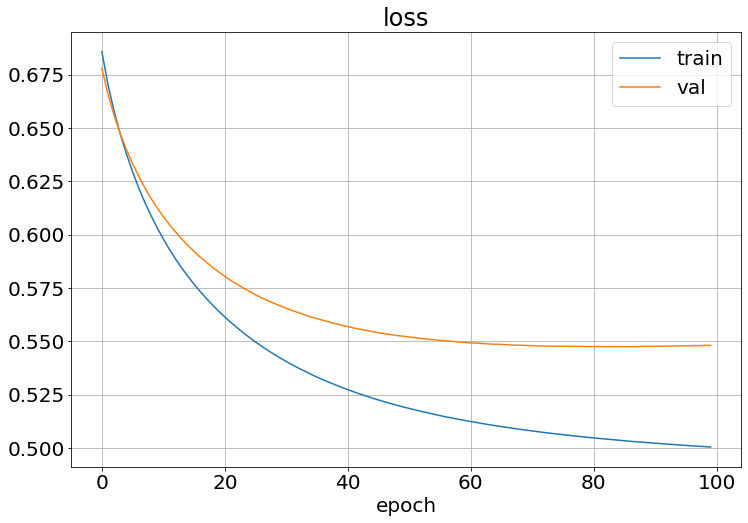

In [16]:
plot_keras(logistic_regression_2, "loss")

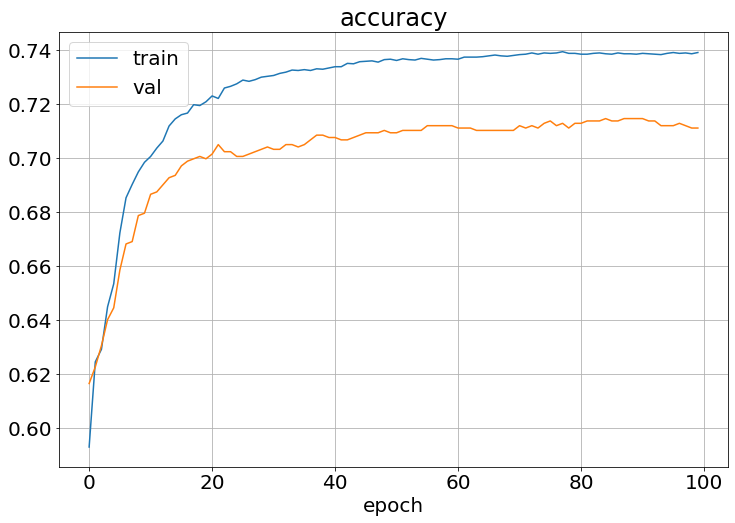

In [17]:
plot_keras(logistic_regression_2, "accuracy")

### Adding Regularization to the Logistic Regression Model

In [18]:
logistic_regression_reg = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(1e-2))])

logistic_regression_reg.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                            optimizer=tf.keras.optimizers.Adam(),
                            metrics=[tf.keras.metrics.BinaryAccuracy(), 
                                     tf.keras.metrics.AUC()])

logistic_regression_reg.fit(train_tfidf.todense(), train_df["target"], 
                        validation_data=(val_tfidf.todense(), val_df["target"]),
                        epochs=100)

Epoch 1/100
203/203 [==============================] - 1s 3ms/step - loss: 0.6901 - binary_accuracy: 0.5914 - auc_2: 0.6655 - val_loss: 0.6782 - val_binary_accuracy: 0.5972 - val_auc_2: 0.7725
Epoch 2/100
203/203 [==============================] - 0s 2ms/step - loss: 0.6749 - binary_accuracy: 0.5897 - auc_2: 0.7907 - val_loss: 0.6727 - val_binary_accuracy: 0.5893 - val_auc_2: 0.7786
Epoch 3/100
203/203 [==============================] - 0s 1ms/step - loss: 0.6716 - binary_accuracy: 0.5749 - auc_2: 0.7868 - val_loss: 0.6709 - val_binary_accuracy: 0.5718 - val_auc_2: 0.7733
Epoch 4/100
203/203 [==============================] - 0s 1ms/step - loss: 0.6704 - binary_accuracy: 0.5746 - auc_2: 0.7837 - val_loss: 0.6704 - val_binary_accuracy: 0.5709 - val_auc_2: 0.7696
Epoch 5/100
203/203 [==============================] - 0s 2ms/step - loss: 0.6699 - binary_accuracy: 0.5749 - auc_2: 0.7783 - val_loss: 0.6701 - val_binary_accuracy: 0.5709 - val_auc_2: 0.7647
Epoch 6/100
203/203 [==============

203/203 [==============================] - 0s 2ms/step - loss: 0.6692 - binary_accuracy: 0.5744 - auc_2: 0.7657 - val_loss: 0.6700 - val_binary_accuracy: 0.5692 - val_auc_2: 0.7552
Epoch 44/100
203/203 [==============================] - 0s 2ms/step - loss: 0.6692 - binary_accuracy: 0.5750 - auc_2: 0.7674 - val_loss: 0.6699 - val_binary_accuracy: 0.5709 - val_auc_2: 0.7558
Epoch 45/100
203/203 [==============================] - 0s 1ms/step - loss: 0.6693 - binary_accuracy: 0.5732 - auc_2: 0.7661 - val_loss: 0.6700 - val_binary_accuracy: 0.5709 - val_auc_2: 0.7556
Epoch 46/100
203/203 [==============================] - 0s 2ms/step - loss: 0.6692 - binary_accuracy: 0.5724 - auc_2: 0.7678 - val_loss: 0.6700 - val_binary_accuracy: 0.5692 - val_auc_2: 0.7548
Epoch 47/100
203/203 [==============================] - 0s 1ms/step - loss: 0.6693 - binary_accuracy: 0.5744 - auc_2: 0.7660 - val_loss: 0.6699 - val_binary_accuracy: 0.5709 - val_auc_2: 0.7565
Epoch 48/100
203/203 [=====================

203/203 [==============================] - 0s 1ms/step - loss: 0.6692 - binary_accuracy: 0.5715 - auc_2: 0.7677 - val_loss: 0.6700 - val_binary_accuracy: 0.5709 - val_auc_2: 0.7552
Epoch 86/100
203/203 [==============================] - 0s 2ms/step - loss: 0.6693 - binary_accuracy: 0.5729 - auc_2: 0.7654 - val_loss: 0.6699 - val_binary_accuracy: 0.5692 - val_auc_2: 0.7548
Epoch 87/100
203/203 [==============================] - 0s 1ms/step - loss: 0.6693 - binary_accuracy: 0.5733 - auc_2: 0.7665 - val_loss: 0.6699 - val_binary_accuracy: 0.5701 - val_auc_2: 0.7544
Epoch 88/100
203/203 [==============================] - 0s 1ms/step - loss: 0.6692 - binary_accuracy: 0.5730 - auc_2: 0.7663 - val_loss: 0.6700 - val_binary_accuracy: 0.5718 - val_auc_2: 0.7547
Epoch 89/100
203/203 [==============================] - 0s 1ms/step - loss: 0.6693 - binary_accuracy: 0.5713 - auc_2: 0.7684 - val_loss: 0.6700 - val_binary_accuracy: 0.5709 - val_auc_2: 0.7562
Epoch 90/100
203/203 [=====================

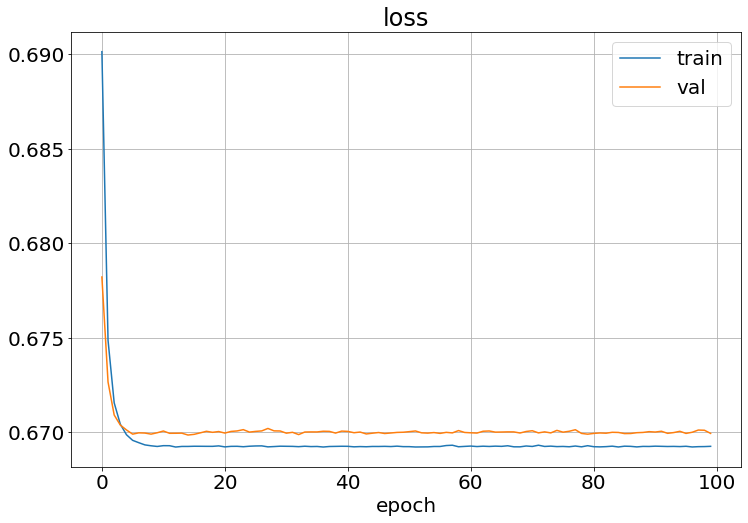

In [19]:
plot_keras(logistic_regression_reg, plot_type="loss")

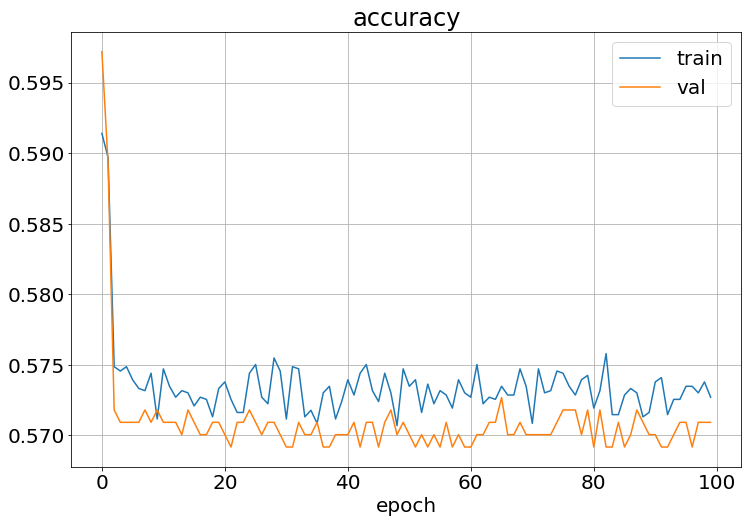

In [20]:
plot_keras(logistic_regression_reg, plot_type="accuracy")

For lambda = 1e-2, the model does not fit the data well.  For lambda = 1e-3 the model is still overfit but with slightly worse performance than without overfitting.  I will therefore try a small dense neural network

## MLP

In [21]:
mlp = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
    ])

mlp.compile(loss=tf.keras.losses.BinaryCrossentropy(),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=[tf.keras.metrics.BinaryAccuracy(), 
                     tf.keras.metrics.AUC()])

mlp.fit(train_tfidf.todense(), train_df["target"],
        validation_data=(val_tfidf.todense(), val_df["target"]),
        epochs=20)

Epoch 1/20
203/203 [==============================] - 2s 3ms/step - loss: 0.5697 - binary_accuracy: 0.6954 - auc_3: 0.7584 - val_loss: 0.4667 - val_binary_accuracy: 0.7890 - val_auc_3: 0.8453
Epoch 2/20
203/203 [==============================] - 0s 2ms/step - loss: 0.4201 - binary_accuracy: 0.8184 - auc_3: 0.8768 - val_loss: 0.4636 - val_binary_accuracy: 0.7837 - val_auc_3: 0.8503
Epoch 3/20
203/203 [==============================] - 1s 3ms/step - loss: 0.3698 - binary_accuracy: 0.8433 - auc_3: 0.9044 - val_loss: 0.4511 - val_binary_accuracy: 0.7933 - val_auc_3: 0.8539
Epoch 4/20
203/203 [==============================] - 0s 2ms/step - loss: 0.3175 - binary_accuracy: 0.8742 - auc_3: 0.9270 - val_loss: 0.5014 - val_binary_accuracy: 0.7942 - val_auc_3: 0.8495
Epoch 5/20
203/203 [==============================] - 0s 2ms/step - loss: 0.2464 - binary_accuracy: 0.9105 - auc_3: 0.9535 - val_loss: 0.5293 - val_binary_accuracy: 0.7863 - val_auc_3: 0.8395
Epoch 6/20
203/203 [====================

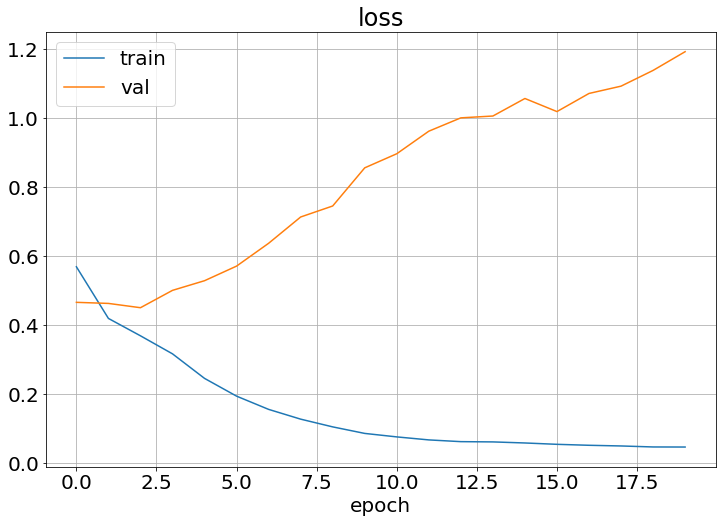

In [22]:
plot_keras(mlp, plot_type="loss")

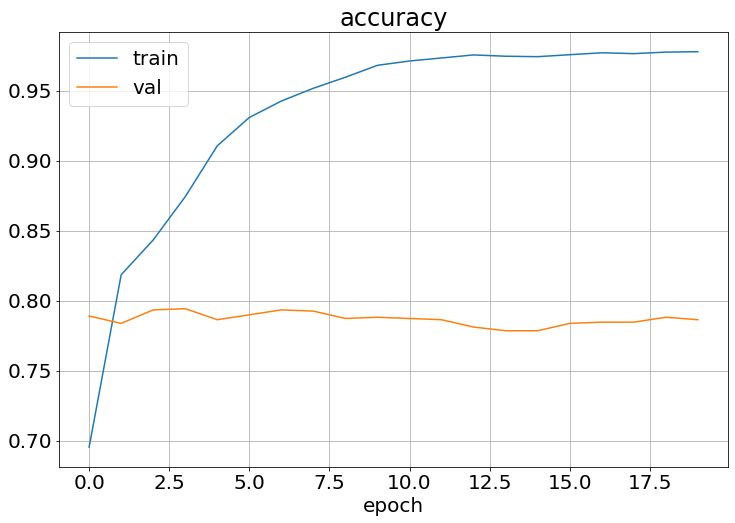

In [23]:
plot_keras(mlp, plot_type="accuracy")

Deeply overfit

In [24]:
lambda_reg = 5e-3
mlp_reg = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(lambda_reg)),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(lambda_reg)),
    tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(lambda_reg)),
    tf.keras.layers.Dense(units=16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(lambda_reg)),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
    ])

mlp_reg.compile(loss=tf.keras.losses.BinaryCrossentropy(),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=[tf.keras.metrics.BinaryAccuracy(), 
                     tf.keras.metrics.AUC()])

mlp_reg.fit(train_tfidf.todense(), train_df["target"],
        validation_data=(val_tfidf.todense(), val_df["target"]),
        epochs=20)

Epoch 1/20
203/203 [==============================] - 2s 5ms/step - loss: 1.0354 - binary_accuracy: 0.6345 - auc_4: 0.6872 - val_loss: 0.6475 - val_binary_accuracy: 0.7539 - val_auc_4: 0.8247
Epoch 2/20
203/203 [==============================] - 1s 3ms/step - loss: 0.6053 - binary_accuracy: 0.7784 - auc_4: 0.8343 - val_loss: 0.5890 - val_binary_accuracy: 0.7802 - val_auc_4: 0.8401
Epoch 3/20
203/203 [==============================] - 1s 3ms/step - loss: 0.5667 - binary_accuracy: 0.7903 - auc_4: 0.8524 - val_loss: 0.5706 - val_binary_accuracy: 0.7758 - val_auc_4: 0.8433
Epoch 4/20
203/203 [==============================] - 1s 3ms/step - loss: 0.5519 - binary_accuracy: 0.7942 - auc_4: 0.8565 - val_loss: 0.5547 - val_binary_accuracy: 0.7933 - val_auc_4: 0.8494
Epoch 5/20
203/203 [==============================] - 1s 3ms/step - loss: 0.5424 - binary_accuracy: 0.8011 - auc_4: 0.8595 - val_loss: 0.5722 - val_binary_accuracy: 0.7706 - val_auc_4: 0.8488
Epoch 6/20
203/203 [====================

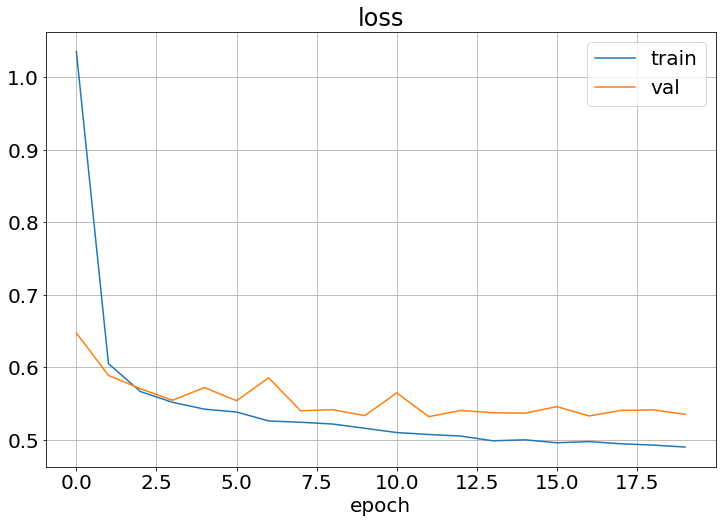

In [25]:
plot_keras(mlp_reg, plot_type="loss")

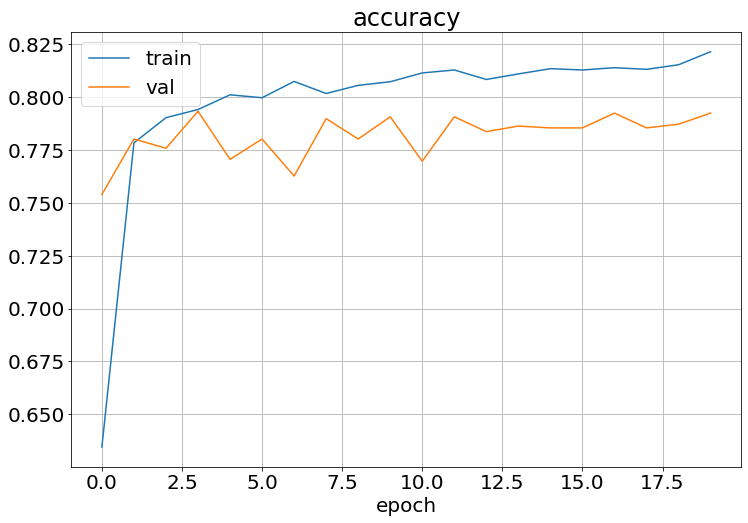

In [26]:
plot_keras(mlp_reg, plot_type="accuracy")

## SVM with Scikit-Learn

In [27]:
from sklearn.svm import SVC

In [28]:
rbf_svm = SVC(kernel='rbf')

In [29]:
rbf_svm.fit(train_tfidf.todense(), train_df["target"])

SVC()

In [30]:
predicted_val_values_from_svm = rbf_svm.predict(val_tfidf.todense())

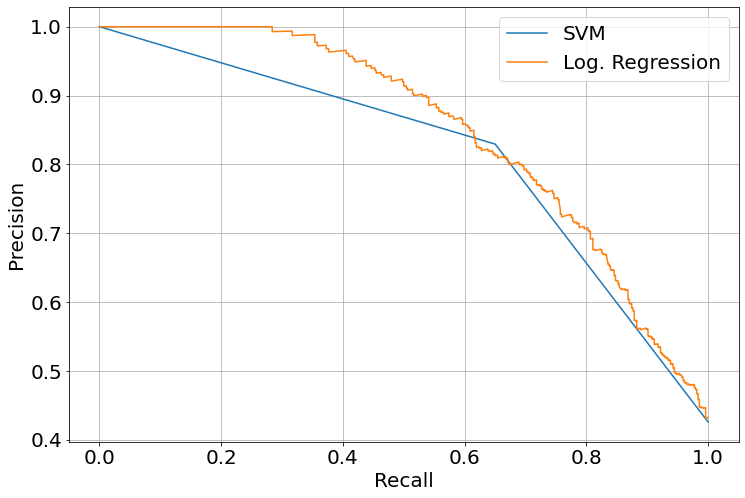

In [31]:
precision_svm, recall_svm, t_ = precision_recall_curve(val_df["target"], predicted_val_values_from_svm)
plt.plot(recall_svm, precision_svm, label="SVM")
plt.plot(recall, precision, label="Log. Regression")
plt.grid()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

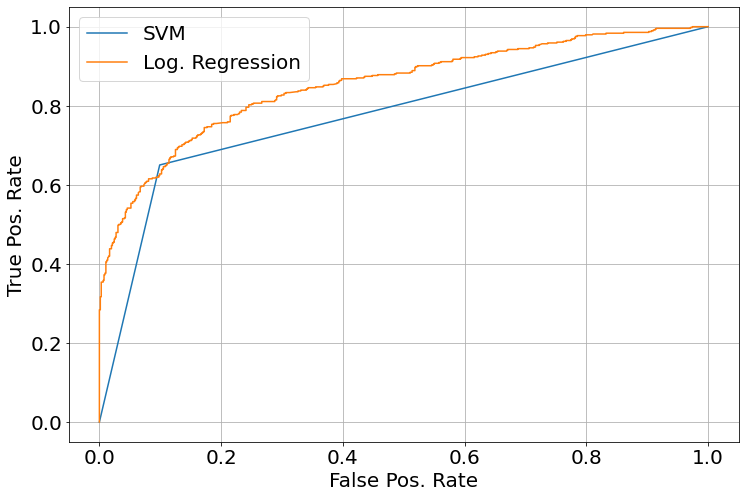

In [32]:
svm_fpr, svm_tpr, svm_t = roc_curve(val_df["target"], predicted_val_values_from_svm)
lr_fpr, lr_tpr, lr_t = roc_curve(val_df["target"], val_predict_logistic_regression)

plt.plot(svm_fpr, svm_tpr, label="SVM")
plt.plot(lr_fpr, lr_tpr, label="Log. Regression")
plt.ylabel("True Pos. Rate")
plt.xlabel("False Pos. Rate")
plt.grid()
plt.legend()